Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/Users/aayus/OneDrive/Desktop/netflix.csv")


#### Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [4]:
# Filtering  Data Column wise so that each row has one director,one genre,one actor, one country

# 1. Separting Casts in each column
constraint2=df["cast"].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head(20)

# 2.Separting Country in each column
constraint3=df["country"].apply(lambda x:str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df["title"])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:"country"},inplace=True)
df_new3.drop(columns="level_1",axis=1,inplace=True)

# 3. Separting Genres in each column
constraint4=df["listed_in"].apply(lambda x:str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df["title"])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:"Genre"},inplace=True)
df_new4.drop(columns="level_1",axis=1,inplace=True)

# 5. Separting Directors in each column
constraint5=df["director"].apply(lambda x:str(x).split(', ')).tolist()
df_new5=pd.DataFrame(constraint5,index=df["title"])
df_new5=df_new5.stack()
df_new5=pd.DataFrame(df_new5.reset_index())
df_new5.rename(columns={0:"director"},inplace=True)
df_new5.drop(columns="level_1",axis=1,inplace=True)

#merging actor and country
df1=pd.merge(df_new2,df_new3,on="title",how="inner")
#merging df1 and genre
df2=pd.merge(df1,df_new4,on="title",how="inner")
#merging df2 and director
df3=pd.merge(df2,df_new5,on="title",how="inner")

# Replace NAN values
df3["director"].replace(["nan"],["UnKnown Director"],inplace=True)
df3["Actors"].replace(["nan"],["Unknown Actor"],inplace=True)
df3["country"].replace(["nan"],[np.nan],inplace=True)

# JOining above merged data with original data i.e df
df_final=df3.merge(df[["title","show_id","type","date_added","release_year","rating","duration"]],on="title",how="left")

# making new column Month i,e extracting month from Date_added column
df_final["month"]=df_final["date_added"].apply(lambda x:str(x).split(','))
df_final["month"]=df_final["month"].str[-2]



In [5]:
# now Separting above filtered data in two types i.e MOVIES & TV-SHOWS
def myfunc(data):
    if data== "Movie":
        return 1
    else:
        return 0

df_final["new"]=df_final["type"].apply(myfunc)
# MOVIES
df_final_movies=df_final[df_final["new"]==1]
# TV-SHOWS
df_final_season=df_final[df_final["new"]==0]    

# Dropping column new from movies data and TV-SHOW data
df_final_season.drop(columns=["new"],inplace=True)
df_final_movies.drop(columns=["new"],inplace=True)

C:\Users\aayus\AppData\Local\Temp\ipykernel_12972\1102067653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_season.drop(columns=["new"],inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_12972\1102067653.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_movies.drop(columns=["new"],inplace=True)


In [6]:
# droping  show_id and date_added column from both filtered movies and tv-shows
df_final_movies=df_final_movies.drop(columns=["show_id","date_added"])
df_final_season=df_final_season.drop(columns=["show_id","date_added"])

In [86]:
df_final_movies

,title,Actors,country,Genre,director,type,release_year,rating,duration,month
0,Dick Johnson Is Dead,Unknown Actor,United States,Documentaries,Kirsten Johnson,Movie,2020,PG-13,90 min,September 25
159,My Little Pony: A New Generation,Vanessa Hudgens,NaN,Children & Family Movies,Robert Cullen,Movie,2021,PG,91 min,September 24
160,My Little Pony: A New Generation,Vanessa Hudgens,NaN,Children & Family Movies,José Luis Ucha,Movie,2021,PG,91 min,September 24
161,My Little Pony: A New Generation,Kimiko Glenn,NaN,Children & Family Movies,Robert Cullen,Movie,2021,PG,91 min,September 24
162,My Little Pony: A New Generation,Kimiko Glenn,NaN,Children & Family Movies,José Luis Ucha,Movie,2021,PG,91 min,September 24
...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,International Movies,Mozez Singh,Movie,2015,TV-14,111 min,March 2
201987,Zubaan,Anita Shabdish,India,Music & Musicals,Mozez Singh,Movie,2015,TV-14,111 min,March 2
201988,Zubaan,Chittaranjan Tripathy,India,Dramas,Mozez Singh,Movie,2015,TV-14,111 min,March 2
201989,Zubaan,Chittaranjan Tripathy,India,International Movies,Mozez Singh,Movie,2015,TV-14,111 min,March 2


In [87]:
df_final_season

,title,Actors,country,Genre,director,type,release_year,rating,duration,month
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September 24
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September 24
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September 24
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September 24
5,Blood & Water,Khosi Ngema,South Africa,TV Dramas,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September 24
...,...,...,...,...,...,...,...,...,...,...
201864,Zindagi Gulzar Hai,Hina Khawaja Bayat,Pakistan,Romantic TV Shows,UnKnown Director,TV Show,2012,TV-PG,1 Season,December 15
201865,Zindagi Gulzar Hai,Hina Khawaja Bayat,Pakistan,TV Dramas,UnKnown Director,TV Show,2012,TV-PG,1 Season,December 15
201932,Zombie Dumb,Unknown Actor,NaN,Kids' TV,UnKnown Director,TV Show,2018,TV-Y7,2 Seasons,July 1
201933,Zombie Dumb,Unknown Actor,NaN,Korean TV Shows,UnKnown Director,TV Show,2018,TV-Y7,2 Seasons,July 1


### Defining Problem Statement and Analysing basic metrics

PROBLEM STATEMENT :
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.
By seeing the Data of netflix I observed Netflix is one of the most popular media and video streaming platforms.
They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally.
1.How has the number of movies released per year changed over the last 20-30 years?
2.Comparison of tv shows vs. movies? 
3.What is the best time to launch a TV show?
4.Analysis of actors/directors of different types of shows/movies.
5.Does Netflix has more focus on TV Shows than movies in recent years
6.Understanding what content is available in different countries

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [38]:
# only Movies data
df_final_movies

,title,Actors,country,Genre,director,show_id,type,date_added,release_year,rating,duration,month
0,Dick Johnson Is Dead,Unknown Actor,United States,Documentaries,Kirsten Johnson,s1,Movie,"September 25, 2021",2020,PG-13,90 min,September 25
159,My Little Pony: A New Generation,Vanessa Hudgens,NaN,Children & Family Movies,Robert Cullen,s7,Movie,"September 24, 2021",2021,PG,91 min,September 24
160,My Little Pony: A New Generation,Vanessa Hudgens,NaN,Children & Family Movies,José Luis Ucha,s7,Movie,"September 24, 2021",2021,PG,91 min,September 24
161,My Little Pony: A New Generation,Kimiko Glenn,NaN,Children & Family Movies,Robert Cullen,s7,Movie,"September 24, 2021",2021,PG,91 min,September 24
162,My Little Pony: A New Generation,Kimiko Glenn,NaN,Children & Family Movies,José Luis Ucha,s7,Movie,"September 24, 2021",2021,PG,91 min,September 24
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,International Movies,Mozez Singh,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,March 2
201987,Zubaan,Anita Shabdish,India,Music & Musicals,Mozez Singh,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,March 2
201988,Zubaan,Chittaranjan Tripathy,India,Dramas,Mozez Singh,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,March 2
201989,Zubaan,Chittaranjan Tripathy,India,International Movies,Mozez Singh,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,March 2


In [41]:
# only TV-SHOW DATA
df_final_season

,title,Actors,country,Genre,director,show_id,type,date_added,release_year,rating,duration,month
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September 24
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September 24
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September 24
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September 24
5,Blood & Water,Khosi Ngema,South Africa,TV Dramas,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September 24
...,...,...,...,...,...,...,...,...,...,...,...,...
201864,Zindagi Gulzar Hai,Hina Khawaja Bayat,Pakistan,Romantic TV Shows,UnKnown Director,s8801,TV Show,"December 15, 2016",2012,TV-PG,1 Season,December 15
201865,Zindagi Gulzar Hai,Hina Khawaja Bayat,Pakistan,TV Dramas,UnKnown Director,s8801,TV Show,"December 15, 2016",2012,TV-PG,1 Season,December 15
201932,Zombie Dumb,Unknown Actor,NaN,Kids' TV,UnKnown Director,s8804,TV Show,"July 1, 2019",2018,TV-Y7,2 Seasons,July 1
201933,Zombie Dumb,Unknown Actor,NaN,Korean TV Shows,UnKnown Director,s8804,TV Show,"July 1, 2019",2018,TV-Y7,2 Seasons,July 1


### Non-Graphical Analysis: Value counts and unique attributes

In [7]:
# UNIQUE ATTRIBUTES
print("No. of ratings - ",df["rating"].nunique())
print("Total Titles - ",df["title"].nunique())
print("Total Directors - ",df["director"].nunique())
print("Total country - ",df["country"].nunique())
print("Total years  - ",df["release_year"].nunique())
print("Total Genres - ",df["listed_in"].nunique())

No. of ratings -  17
Total Titles -  8807
Total Directors -  4528
Total country -  748
Total years  -  74
Total Genres -  514


In [8]:
# ATTRIBUTES VALUE COUNTS 
print("********* Name of types on Netflix ************* ")
print(pd.DataFrame(df["type"].value_counts().reset_index()))
print()
print("********* Name of country having shows on Netflix ************* ")
print(pd.DataFrame(df["country"].value_counts().reset_index()))
print("********* Name of titles on Netflix ************* ")
print(pd.DataFrame(df["title"].value_counts().reset_index()))
print()
print("********* Name of Directors on Netflix from MOVIES ************* ")
print(pd.DataFrame(df_final_movies["director"].value_counts().reset_index()))
print()
print("********* Name of Directors on Netflix  From TV-SHOWS ************* ")
print(pd.DataFrame(df_final_season["director"].value_counts().reset_index()))
print()
print("********* Name of Actors on Netflix  From Movies ************* ")
print(pd.DataFrame(df_final_movies["Actors"].value_counts().reset_index()))
print()
print("********* Name of Actors on Netflix  From TV-SHOWS ************* ")
print(pd.DataFrame(df_final_season["Actors"].value_counts().reset_index()))



********* Name of types on Netflix ************* 
     index  type
0    Movie  6131
1  TV Show  2676

********* Name of country having shows on Netflix ************* 
                                      index  country
0                             United States     2818
1                                     India      972
2                            United Kingdom      419
3                                     Japan      245
4                               South Korea      199
..                                      ...      ...
743              Romania, Bulgaria, Hungary        1
744                      Uruguay, Guatemala        1
745                France, Senegal, Belgium        1
746  Mexico, United States, Spain, Colombia        1
747            United Arab Emirates, Jordan        1

[748 rows x 2 columns]
********* Name of titles on Netflix ************* 
                                      index  title
0                      Dick Johnson Is Dead      1
1                   

In [52]:
print("********* Name of Genres on Netflix from movies ************* ")
print(pd.DataFrame(df_final_movies["Genre"].value_counts().reset_index()))
print()
print("********* Name of Genres on Netflix from TV-SHOWS ************* ")
print(pd.DataFrame(df_final_season["Genre"].value_counts().reset_index()))


********* Name of Genres on Netflix from movies ************* 
                       index  Genre
0                     Dramas  29775
1       International Movies  28211
2                   Comedies  20829
3         Action & Adventure  12216
4         Independent Movies   9834
5   Children & Family Movies   9771
6                  Thrillers   7107
7            Romantic Movies   6412
8              Horror Movies   4571
9           Sci-Fi & Fantasy   4037
10          Music & Musicals   3077
11             Documentaries   2407
12             Sports Movies   1531
13            Classic Movies   1434
14               Cult Movies   1077
15            Anime Features   1045
16              LGBTQ Movies    838
17      Faith & Spirituality    719
18           Stand-Up Comedy    540
19                    Movies    412

********* Name of Genres on Netflix from TV-SHOWS ************* 
                           index  Genre
0         International TV Shows  12845
1                      TV Dramas   

### Visual Analysis - Univariate, Bivariate after pre-processing of the data

In [38]:
# considering the top datas from both Movies and TV-SHOWS
#1. Movies
top_3_genres=df_final_movies["Genre"].value_counts().index[:3]
top_3_titles=df_final_movies["title"].value_counts().index[:10]
top_3_actors=df_final_movies["Actors"].value_counts().index[:4]
top_3_directors=df_final_movies["director"].value_counts().index[:4]
top_3_months=df_final_movies["month"].value_counts().index[:3]
top_3_countries=df_final_movies["country"].value_counts().index[:3]
top_3_ratings_movies=df_final_movies["rating"].value_counts().index[:3]
top_25_years=df_final_movies["release_year"].value_counts().index[:25]
top_10_duration=df_final_movies["duration"].value_counts().index[:10]
#2. TV-SHOWS
top_3_genres1=df_final_season["Genre"].value_counts().index[:3]
top_3_titles1=df_final_season["title"].value_counts().index[:10]
top_3_actors1=df_final_season["Actors"].value_counts().index[:4]
top_3_directors1=df_final_season["director"].value_counts().index[:4]
top_3_months1=df_final_season["month"].value_counts().index[:3]
top_3_countries1=df_final_season["country"].value_counts().index[:3]
top_3_ratings_seasons1=df_final_season["rating"].value_counts().index[:3]
top_25_years1=df_final_season["release_year"].value_counts().index[:25]
top_10_duration1=df_final_season["duration"].value_counts().index[:10]

### For continuous variable(s): Distplot, countplot, histogram for univariate analysis 

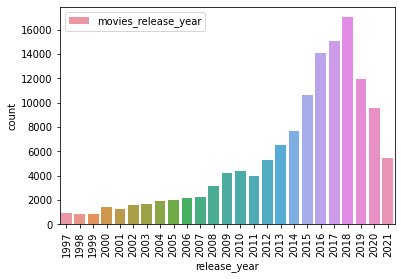

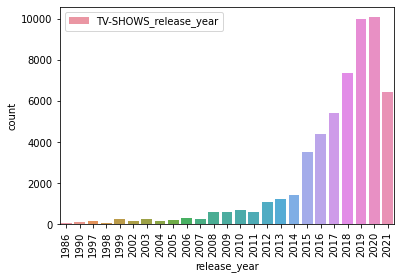

In [133]:
                                       # countplot for release_year
#movies
top_25_releaseyears=df_final_movies.loc[(df_final_movies["release_year"].isin(top_25_years))]
sns.countplot(data=top_25_releaseyears,x="release_year")
plt.xticks(rotation=90)
plt.legend(["movies_release_year"])
plt.show()
# seasons
top_25_releaseyears1=df_final_season.loc[(df_final_season["release_year"].isin(top_25_years1))]
sns.countplot(data=top_25_releaseyears1,x="release_year")
plt.xticks(rotation=90)
plt.legend(["TV-SHOWS_release_year"])            
plt.show()

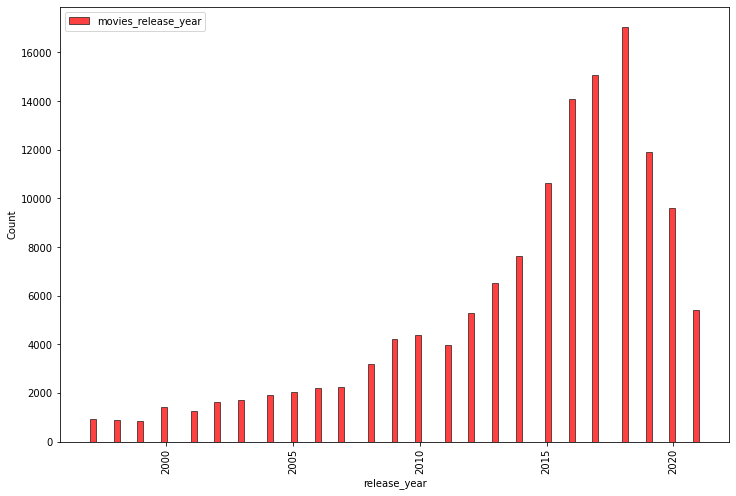

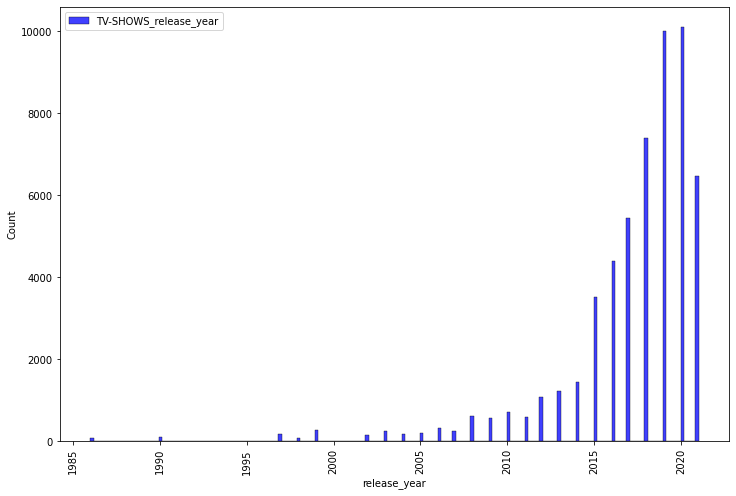

In [134]:
                                    # histplot for release_year
#movies
plt.figure(figsize=(12,8))
sns.histplot(data=top_25_releaseyears,x="release_year",color="red")
plt.xticks(rotation=90)
plt.legend(["movies_release_year","counts"])
plt.show()
#seasons
plt.figure(figsize=(12,8))
top_25_releaseyears1=df_final_season.loc[(df_final_season["release_year"].isin(top_25_years1))]
sns.histplot(data=top_25_releaseyears1,x="release_year",color="blue")
plt.xticks(rotation=90)
plt.legend(["TV-SHOWS_release_year"])            
plt.show()

<Figure size 864x576 with 0 Axes>

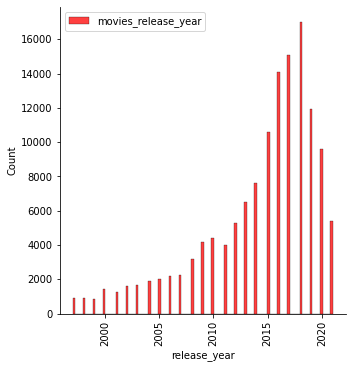

<Figure size 864x576 with 0 Axes>

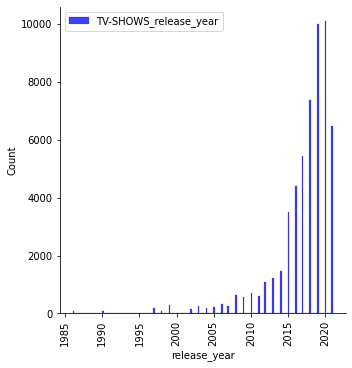

In [135]:
                                  # Displot for Release_years
#movies
plt.figure(figsize=(12,8))
sns.displot(data=top_25_releaseyears,x="release_year",color="red")
plt.xticks(rotation=90)
plt.legend(["movies_release_year","counts"])
plt.show()
#seasons
plt.figure(figsize=(12,8))
top_25_releaseyears1=df_final_season.loc[(df_final_season["release_year"].isin(top_25_years1))]
sns.displot(data=top_25_releaseyears1,x="release_year",color="blue")
plt.xticks(rotation=90)
plt.legend(["TV-SHOWS_release_year"])            
plt.show()

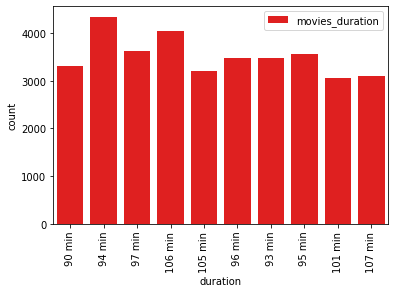

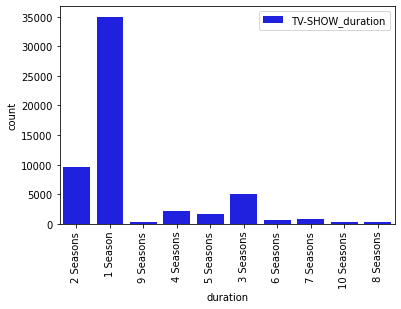

In [136]:
                                   #Countplot for duration
#movies
top_10_duration_movies=df_final_movies.loc[(df_final_movies["duration"].isin(top_10_duration))]
sns.countplot(data=top_10_duration_movies,x="duration",color="red")
plt.xticks(rotation=90)
plt.legend(["movies_duration"])
plt.show()
#seaons
top_10_duration_season=df_final_season.loc[(df_final_season["duration"].isin(top_10_duration1))]
sns.countplot(data=top_10_duration_season,x="duration",color="blue")
plt.xticks(rotation=90)
plt.legend(["TV-SHOW_duration"])
plt.show()

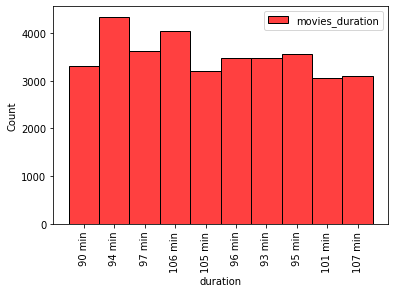

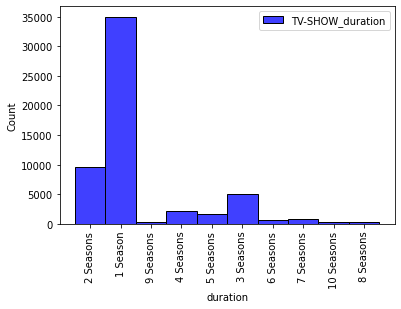

In [137]:
                                             # histplot for release_year
#movies
top_10_duration_movies=df_final_movies.loc[(df_final_movies["duration"].isin(top_10_duration))]
sns.histplot(data=top_10_duration_movies,x="duration",color="red")
plt.xticks(rotation=90)
plt.legend(["movies_duration"])
plt.show()
#seaons
top_10_duration_season=df_final_season.loc[(df_final_season["duration"].isin(top_10_duration1))]
sns.histplot(data=top_10_duration_season,x="duration",color="blue")
plt.xticks(rotation=90)
plt.legend(["TV-SHOW_duration"])
plt.show()

#### For categorical variable(s): Boxplot 

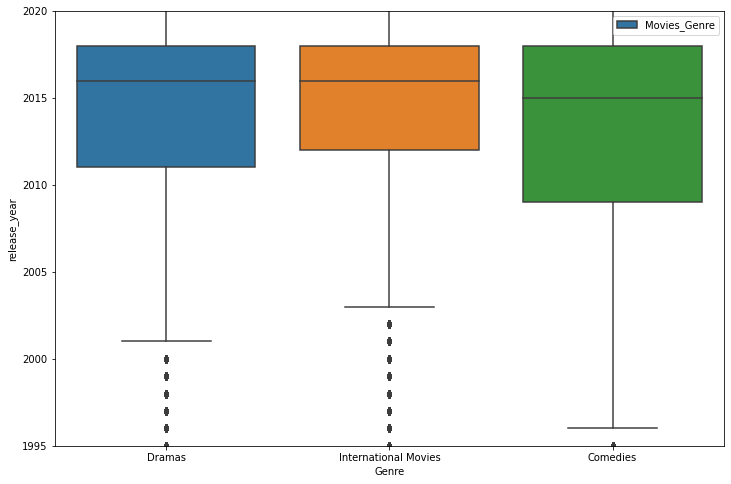

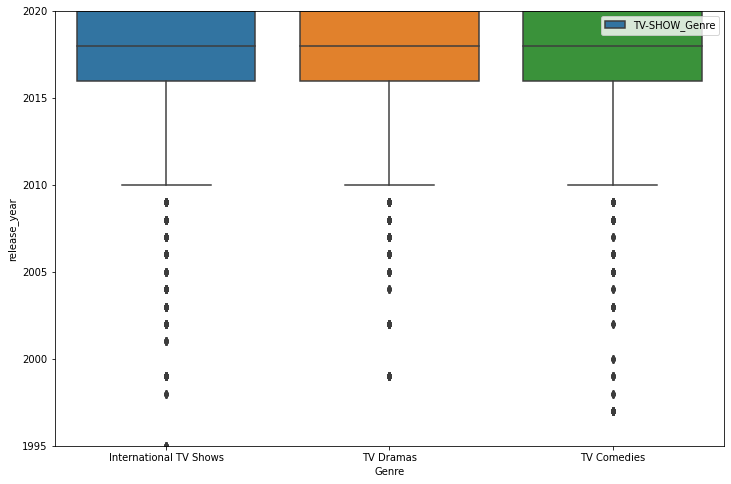

In [138]:
                                    # TOP 3 Genre v/s last 25 years
#Movies
top_3_data_Genres=df_final_movies.loc[(df_final_movies["Genre"].isin(top_3_genres))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_Genres,x="Genre",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["Movies_Genre"])
plt.show()
#TV-SHOWS
top_3_data_Genres1=df_final_season.loc[(df_final_season["Genre"].isin(top_3_genres1))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_Genres1,x="Genre",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["TV-SHOW_Genre"])
plt.show()

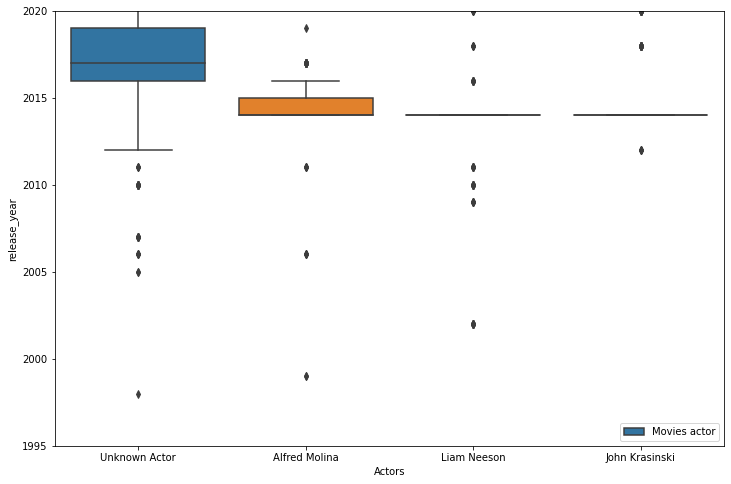

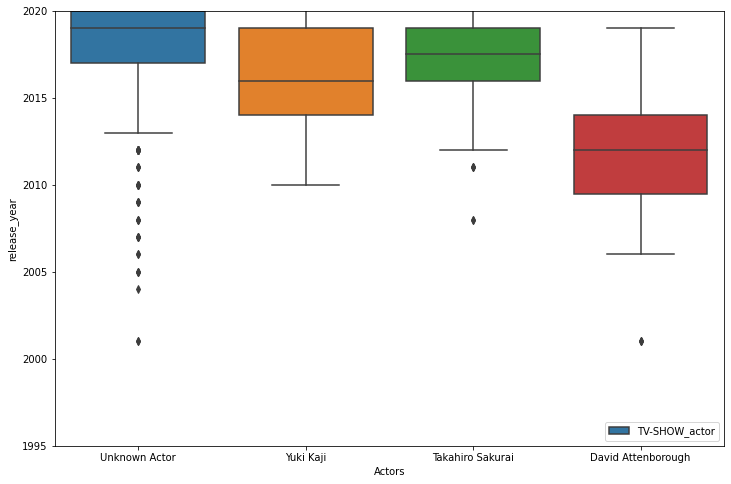

In [14]:
                                # TOP 4 Actor v/s last 25 years
#Movies
top_3_data_actors=df_final_movies.loc[(df_final_movies["Actors"].isin(top_3_actors))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_actors,x="Actors",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["Movies actor"])
plt.show()
#TV-SHOWS
top_3_data_actors1=df_final_season.loc[(df_final_season["Actors"].isin(top_3_actors1))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_actors1,x="Actors",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["TV-SHOW_actor"])
plt.show()

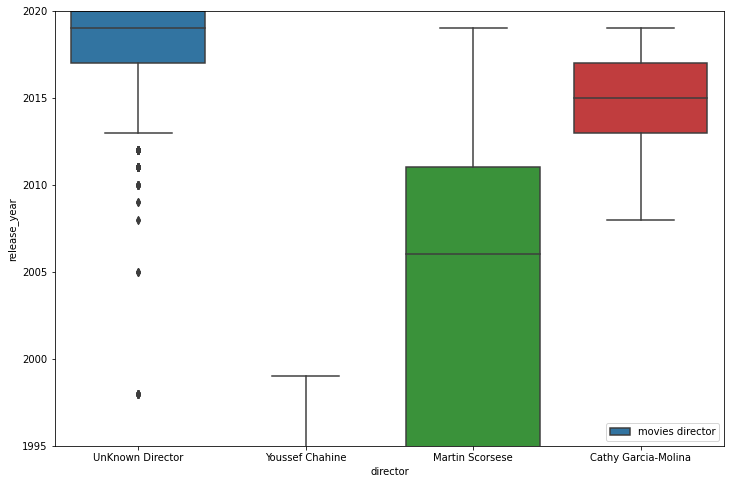

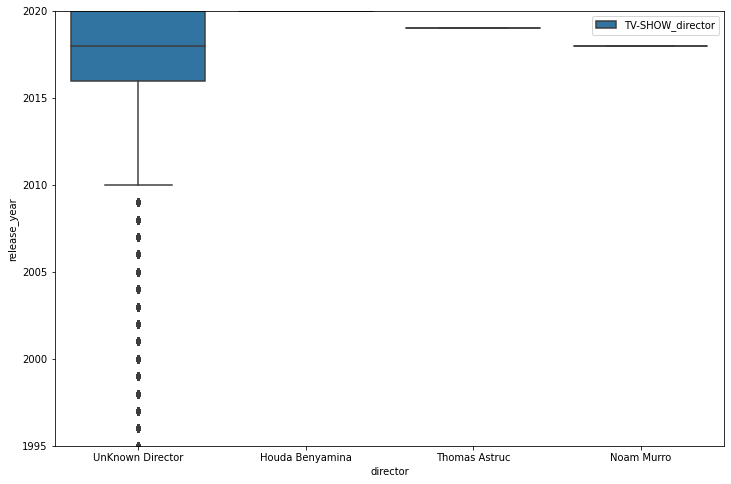

In [15]:
                                # Directors v/s last 25 years
#Movies
top_3_data_directors=df_final_movies.loc[(df_final_movies["director"].isin(top_3_directors))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_directors,x="director",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["movies director"])
plt.show()
#TV-SHOWS
top_3_data_directors1=df_final_season.loc[(df_final_season["director"].isin(top_3_directors1))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_directors1,x="director",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["TV-SHOW_director"])
plt.show()

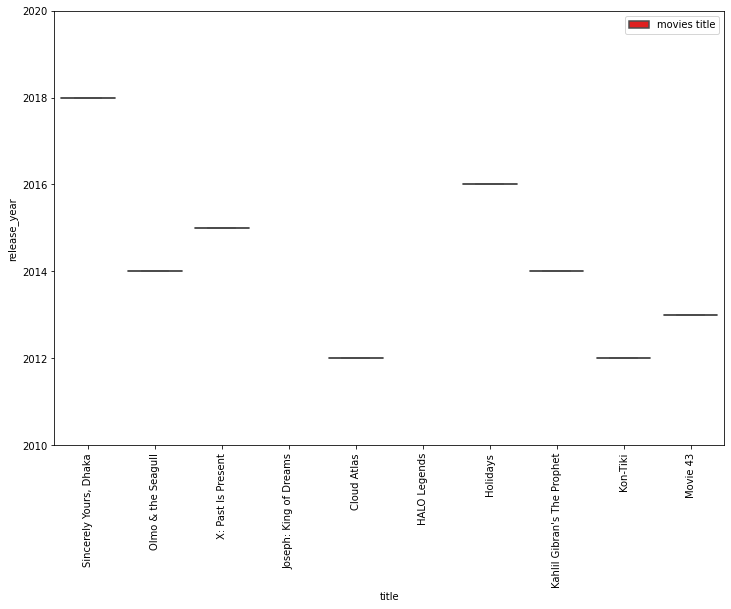

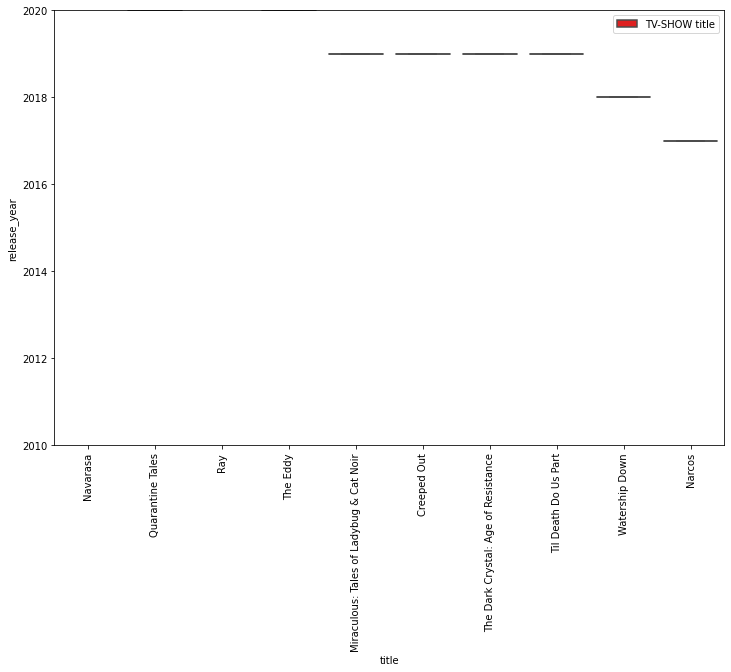

In [45]:
                                               # top Titles v/s last 10 years
#Movies
top_3_data_titles=df_final_movies.loc[(df_final_movies["title"].isin(top_3_titles))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_titles,x="title",y="release_year",color="red")
plt.ylim(bottom=2010,top=2020)
plt.legend(["movies title"])
plt.xticks(rotation=90)
plt.show()

# TV-SHOWS
top_3_data_titles1=df_final_season.loc[(df_final_season["title"].isin(top_3_titles1))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_titles1,x="title",y="release_year",color="red")
plt.ylim(bottom=2010,top=2020)
plt.legend(["TV-SHOW title"])
plt.xticks(rotation=90)
plt.show()

#### For correlation: Heatmaps, Pairplots (10 Points)

In [57]:
top_data_actors_directors=df_final_movies.loc[(df_final_movies["Actors"].isin(top_3_actors)) & (df_final_movies["director"].isin(top_3_directors))]
top_data_actors_directors

,title,Actors,country,Genre,director,type,release_year,rating,duration,month
10052,9to5: The Story of a Movement,Unknown Actor,NaN,Documentaries,UnKnown Director,Movie,2021,TV-MA,85 min,July 22
16652,Sisters on Track,Unknown Actor,NaN,Documentaries,UnKnown Director,Movie,2021,PG,97 min,June 24
16653,Sisters on Track,Unknown Actor,NaN,Sports Movies,UnKnown Director,Movie,2021,PG,97 min,June 24
18759,Trese After Dark,Unknown Actor,NaN,Anime Features,UnKnown Director,Movie,2021,TV-14,36 min,June 11
18760,Trese After Dark,Unknown Actor,NaN,Documentaries,UnKnown Director,Movie,2021,TV-14,36 min,June 11
...,...,...,...,...,...,...,...,...,...,...
183414,Smash: Motorized Mayhem,Unknown Actor,United States,Documentaries,UnKnown Director,Movie,2017,TV-MA,66 min,May 15
183415,Smash: Motorized Mayhem,Unknown Actor,United States,Sports Movies,UnKnown Director,Movie,2017,TV-MA,66 min,May 15
189358,The Darkest Dawn,Unknown Actor,United Kingdom,Action & Adventure,UnKnown Director,Movie,2016,TV-MA,75 min,June 23
189359,The Darkest Dawn,Unknown Actor,United Kingdom,Independent Movies,UnKnown Director,Movie,2016,TV-MA,75 min,June 23


(1995.0, 2020.0)

<Figure size 1440x1080 with 0 Axes>

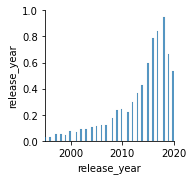

In [85]:
plt.figure(figsize=(20,15))
sns.pairplot(data=df_final_movies)
plt.xlim(left=1995,right=2020)
# plt.ylim(bottom=0,top=1)

###  Insights based on Non-Graphical and Visual Analysis (10 Points)

1 Comments on the range of attributes

2 Comments on the distribution of the variables and relationship between them

3 Comments for each univariate and bivariate plot

## 1
Comments on the range of attributes

1.Based on the given data we observe that there are wide variety of Genres nowdays
2.The platform helps the user to display the most watched shows


## 2

1. Through the data we have have observe there are relationship betwwen directors , casting and actors.
2. As the years are moving forward the Rating depend directly on cast and type of Genre title belogs too

## 3

For univariate plots
1.As the years are moving craze in people for seeing movies and tv-shows are increasing
2.For the duration I see that in movies people like to watch movies duration between 90 to 100 minutes time interval and for tv shows people has high craze for shows having 1 or 2 seasons

For bivariate plots
1.People like to watch high rating movies and shows

### Business Insights  - Should include patterns observed in the data along with what you can infer from it

### For every below plots insight number and result is mentioned

<AxesSubplot: xlabel='type', ylabel='count'>

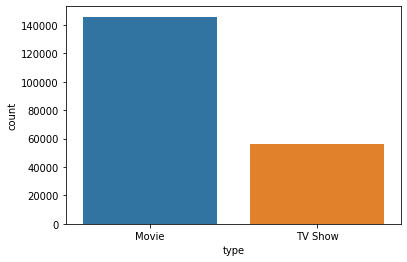

In [142]:
# INSIGHT 1
sns.countplot(data=df_final,x="type")

# RESULT--SHOWS DEMAND OF MOVIES IS MORE THEN TV SHOWS

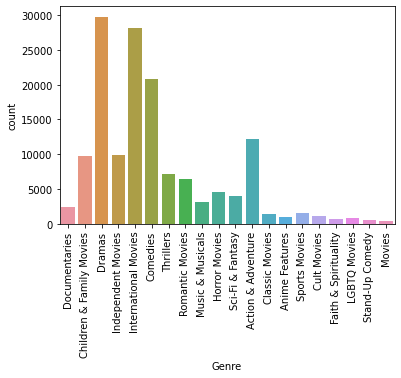

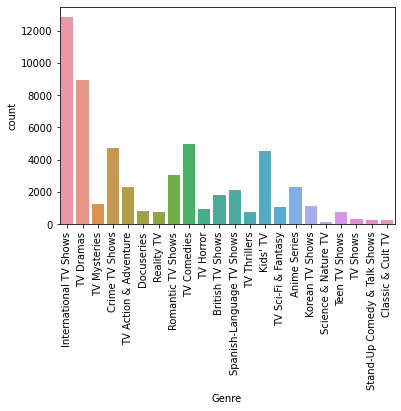

In [89]:
# INSIGHT 2
#movies
sns.countplot(data=df_final_movies,x="Genre")
plt.xticks(rotation=90)
plt.show()

#seasons
sns.countplot(data=df_final_season,x="Genre")
plt.xticks(rotation=90)
plt.show()

## RESULT--
## From the below data we can observe people needs more dramas movies and internation tv shows

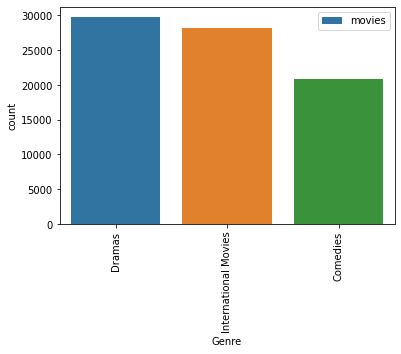

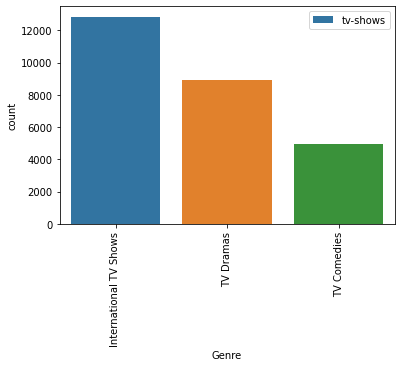

In [135]:
# INSIGHT 3
#movies
top_3_data_Genres=df_final_movies.loc[(df_final_movies["Genre"].isin(top_3_genres))]
sns.countplot(data=top_3_data_Genres,x="Genre")
plt.xticks(rotation=90)
plt.legend(["movies"])
plt.show()
#season
top_3_data_Genres1=df_final_season.loc[(df_final_season["Genre"].isin(top_3_genres1))]
sns.countplot(data=top_3_data_Genres1,x="Genre")
plt.xticks(rotation=90)
plt.legend(["tv-shows"])
plt.show()

# RESULT--
## FROM THE BELOW GRAPH WE SEE TOP 3 GENRES IN MOVIES ARE DRAMAS, INTERNATIONAL MOVIES, COMEDIES
## TOP 3 GENRES IN TV SHOWS ARE INTERNATIONAL TV SHOWS,DRAMAS, TV COMEDIES

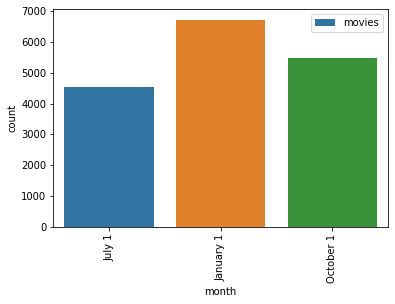

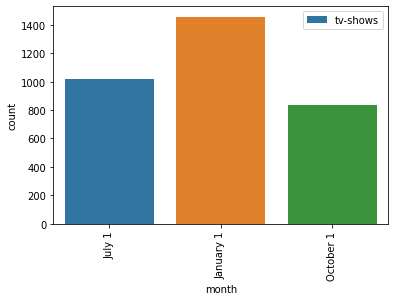

In [111]:
# INSIGHT 4
# movies
top_3_data_months=df_final_movies.loc[(df_final_movies["month"].isin(top_3_months))]
sns.countplot(data=top_3_data_months,x="month")
plt.xticks(rotation=90)
plt.legend(["movies"])
plt.show()
#seasons
top_3_data_months1=df_final_season.loc[(df_final_season["month"].isin(top_3_months))]
sns.countplot(data=top_3_data_months1,x="month")
plt.xticks(rotation=90)
plt.legend(["tv-shows"])
plt.show()

# RESULT--
# FROM THE BELOW WE SEE PEOPLE LIKE MORE MOVIES AND TV-SHOWS TO RELEASE IN MONTH OF JULY, JANUARY, OCTOBER

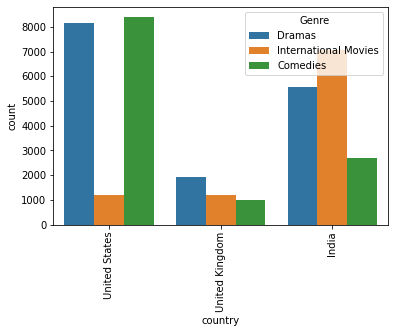

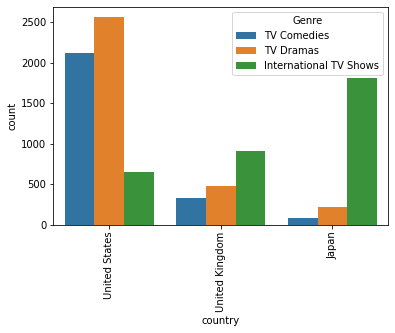

In [102]:
# INSIGHT 5

#movies
top_3_data_Genres_countries=df_final_movies.loc[(df_final_movies["Genre"].isin(top_3_genres)) & (df_final_movies["country"].isin(top_3_countries))]
sns.countplot(data=top_3_data_Genres_countries,x="country",hue="Genre")
plt.xticks(rotation=90)
# plt.legend(["movies"])
plt.show()
#seasons
top_3_data_Genres_countries=df_final_season.loc[(df_final_season["Genre"].isin(top_3_genres1)) & (df_final_season["country"].isin(top_3_countries1))]
sns.countplot(data=top_3_data_Genres_countries,x="country",hue="Genre")
plt.xticks(rotation=90)
plt.show()


# RESULT--
# FROM BELOW WE SEE TOP 3 GENRES IN TOP 3 COUNTRIES I.E IN US PEOPLE LIKE TO WATCH COMEDIES,UK--DRAMAS,INDIA--INTERNATIONAL MOVIES
## FOR TV SHOWS US--TV DRAMAS, UK--INTERNATIONAL TV SHOWS, JAPAN--INTERNATIONAL TV SHOWS
## NOTE IN BOTH MOVIES AND TV SHOWS UNITED STATES AND UNITED KINGDOM ARE TOP CONSISTENT PALYERS

Text(0.5, 1.0, 'release_year v/s rating')

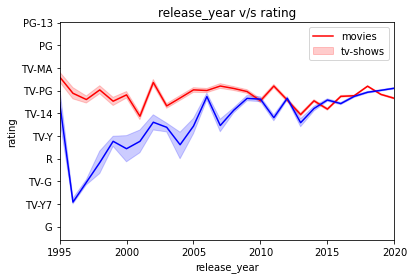

In [110]:
# INSIGHT 6

#movies and seasons
sns.lineplot(data=df_final_movies,
            x="release_year",
            y="rating",color="red")
plt.xlim(left=1995,right=2020)
sns.lineplot(data=df_final_season,
            x="release_year",
            y="rating",color="blue")
plt.xlim(left=1995,right=2020)
plt.legend(["movies","tv-shows"])
plt.title("release_year v/s rating")

# RESULT--
# IN CASE OF MOVIES RATINGS OVER LAST 25 YEARS REAMINS AT SAME LEVEL ALMOST
# IN CASE OF TV SHOWS RATING LEVEL INCREASE DRASTICALLY AND IT IS GOOD TO SEE PEOPLE LIKE TV SHOWS MORE

### Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

1.Netfix should focus on more movies content then Tv-shows

2.Netflix should also focus on rating of movies as for lst 25 years rating have no growth, so it is important to change movies 
content to increase level so that rating in coming years increase as same as ratings of tv-shows

3.Netflix should more focus for content from countries like united states, UK, japan, India

4.Netflix for better revenue should ask directors to release shows more in months of january,july,october

5.Netflix should more focus on Comedy Genre type movies and international tv shows for TV-SHOWS

6.Netflix should upload more movies of actors like Alfred Molina,Liam Neeson, John Krasinski and for TV-SHOWS it should be of actors like Yuki Kaji,Takahiro Sakurai,David Attenborogh

7.Netflix should upload more movies of directors like Youssef Chahine,Martin Scorsese,cathy garcia and for tv shows it should be Houda Benyamina,Thomas Astruc, Noam Murro

8.Netflix should more focus on duaration of movies between 90-110 minutes and for tv-shows it should be 1-2 seasons for better growth

9. Netflix can also see other similar platforms growth that in which region they are more focusing